In [1]:
import pygamma
import pylab
import numpy 
import nmrglue
from pygamma import spin_system, Hcs, HJw, Fm, gen_op, sigma_eq, Iypuls, Ixpuls,evolve, FID, row_vector

from scipy import fftpack

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

%matplotlib inline

In [2]:
dt1 = 0.002 # t1 time increment
dt2 = 0.002 # t2 time increment
t1pts = 1024 # points on t1 axis
t2pts = 1024 # points on t2 axis

In [4]:
sys=spin_system()     # define the system, read in
sys.read("cosy1.sys") # from disk

print( sys)

Spin Index :      0            1            2      
Isotope    :      1H           1H           1H     
Momentum   :     1/2          1/2          1/2     
Shifts     :     0.00 Hz      0.00 Hz      0.00 Hz 
           :     0.50 ppm     0.25 ppm     0.10 ppm
Js Spin 0  :                 10.00 Hz      0.00 Hz 
Js Spin 1  :                              15.00 Hz 
Omega      :   400.00 MHz   400.00 MHz   400.00 MHz



In [5]:
H = Hcs(sys)+ HJw(sys)                                    # // Hamiltonian, weak coupling
detect = gen_op(Fm(sys))                                  # // F- for detection operator
fid = row_vector(t2pts)                                    #block_1D tmp(t2pts); // 1D-data block storage


In [6]:
sigma0 = sigma_eq(sys)                      # // equilibrium density matrix
sigma1 = Iypuls(sys, sigma0, 90)     

In [7]:
FID(sigma1,detect,H,dt2,t2pts,fid)

In [8]:
fid = fid.toNParray()

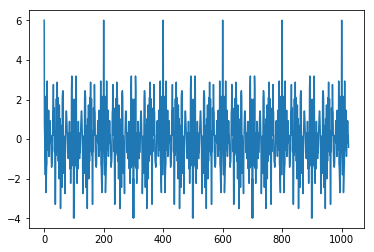

In [9]:
plt.plot(fid.real)

In [10]:
fid = fid * numpy.exp(-dt1*numpy.arange(t2pts)*5.)

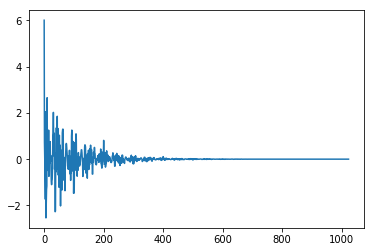

In [11]:
plt.plot(fid.real)

In [12]:
spec = fftpack.fft(fid)

In [13]:
spec = fftpack.fftshift(spec)

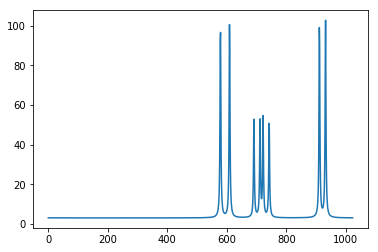

In [14]:
plt.plot(spec.real)

In [15]:
1./dt1/400.

1.25

In [16]:
xxx_ppm = numpy.linspace(-1./dt1/400/2., 1./dt1/400/2., t2pts)

(0.625, -0.625)

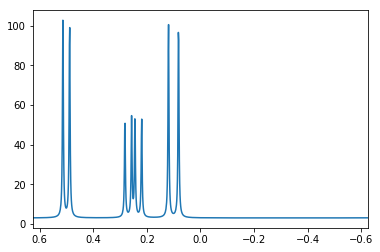

In [17]:
plt.plot( xxx_ppm,spec.real)
plt.xlim(xxx_ppm[-1], xxx_ppm[0])